## GAMBAR 30 NODE

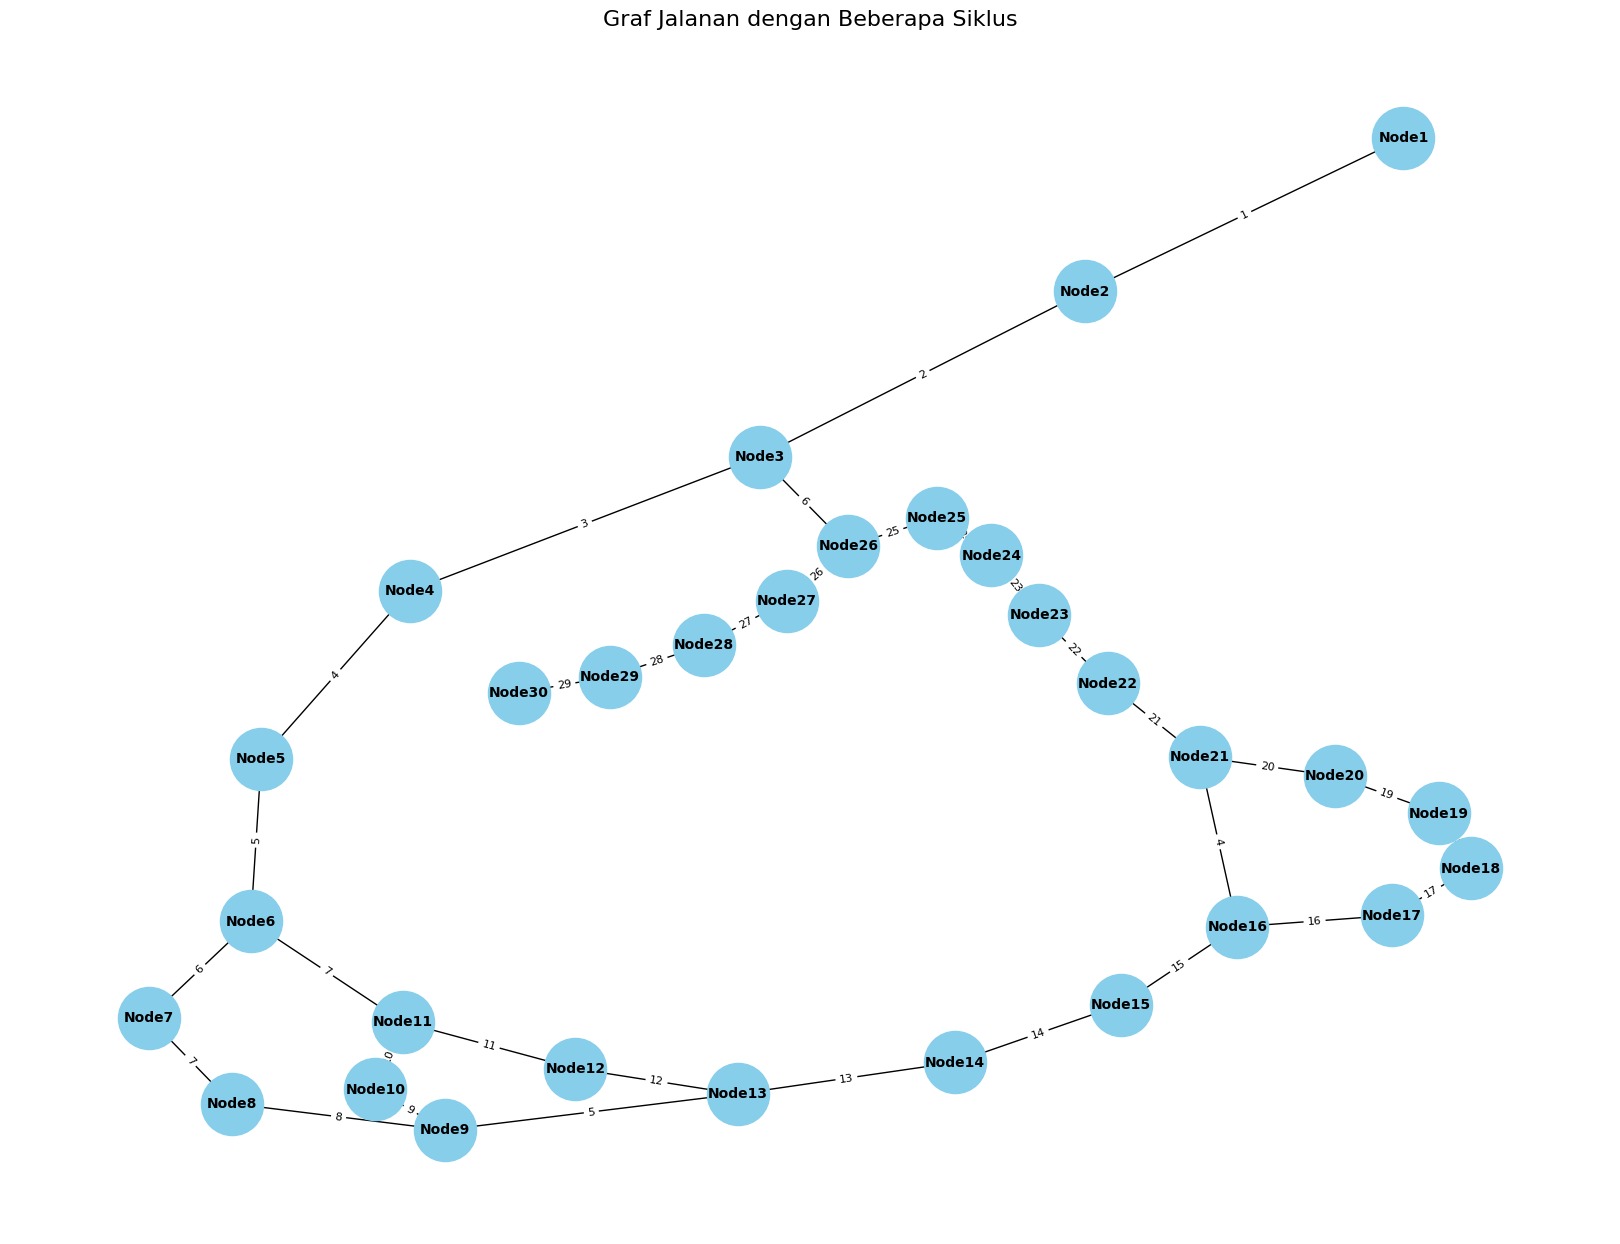

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Definisikan 30 simpul untuk graf
nodes = [f"Node{i}" for i in range(1, 31)]

# Buat graf berbentuk jalanan dengan beberapa siklus
G = nx.Graph()

# Tambahkan edge linear (jalan utama)
for i in range(len(nodes) - 1):
    G.add_edge(nodes[i], nodes[i + 1], weight=i + 1)

# Tambahkan beberapa siklus (loop tambahan)
G.add_edge(nodes[5], nodes[10], weight=7)
G.add_edge(nodes[15], nodes[20], weight=4)
G.add_edge(nodes[25], nodes[2], weight=6)
G.add_edge(nodes[8], nodes[12], weight=5)

# Posisi tata letak node
pos = nx.spring_layout(G, seed=42)  # Atur posisi node agar rapi

# Gambar graf
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight="bold")

# Tambahkan label untuk bobot pada edge
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Judul
plt.title("Graf Jalanan dengan Beberapa Siklus", fontsize=16)
plt.show()


## ALGORITMA A*

In [2]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def a_star_recursive(graph, start, goal, heuristic, open_set=None, g_score=None, came_from=None):
    # Inisialisasi variabel jika belum ada (pada iterasi pertama)
    if open_set is None:
        open_set = []
        heapq.heappush(open_set, (0 + heuristic[start], start))

    if g_score is None:
        g_score = {node: float('inf') for node in graph}
        g_score[start] = 0

    if came_from is None:
        came_from = {}

    # Base case: jika open_set kosong, tidak ada jalur
    if not open_set:
        return None  # Jalur tidak ditemukan

    # Ambil node dengan nilai f (g + h) terkecil dari open_set
    _, current = heapq.heappop(open_set)

    # Jika mencapai tujuan, bangun jalur dari came_from
    if current == goal:
        path = []
        while current in came_from:
            path.append(current)
            current = came_from[current]
        path.append(start)
        return path[::-1]  # Balikkan urutan path

    # Iterasi tetangga dari node saat ini
    for neighbor, cost in graph[current].items():
        tentative_g_score = g_score[current] + cost

        if tentative_g_score < g_score[neighbor]:
            # Update g_score dan jalur
            g_score[neighbor] = tentative_g_score
            f_score = tentative_g_score + heuristic[neighbor]
            came_from[neighbor] = current

            # Jika tetangga belum ada di open_set, tambahkan
            if not any(neighbor == item[1] for item in open_set):
                heapq.heappush(open_set, (f_score, neighbor))

    # Rekursi dengan status terkini
    return a_star_recursive(graph, start, goal, heuristic, open_set, g_score, came_from)


## ALGORITMA DIJKSTRA

In [3]:
def dijkstra(self, start_vertex_data):
        start_vertex = self.vertex_data.index(start_vertex_data)
        distances = [float('inf')] * self.size
        distances[start_vertex] = 0
        visited = [False] * self.size

        for _ in range(self.size):
            min_distance = float('inf')
            u = None
            for i in range(self.size):
                if not visited[i] and distances[i] < min_distance:
                    min_distance = distances[i]
                    u = i

            if u is None:
                break

            visited[u] = True

            for v in range(self.size):
                if self.adj_matrix[u][v] != 0 and not visited[v]:
                    alt = distances[u] + self.adj_matrix[u][v]
                    if alt < distances[v]:
                        distances[v] = alt

        return distances

In [5]:
!pip install celluloid


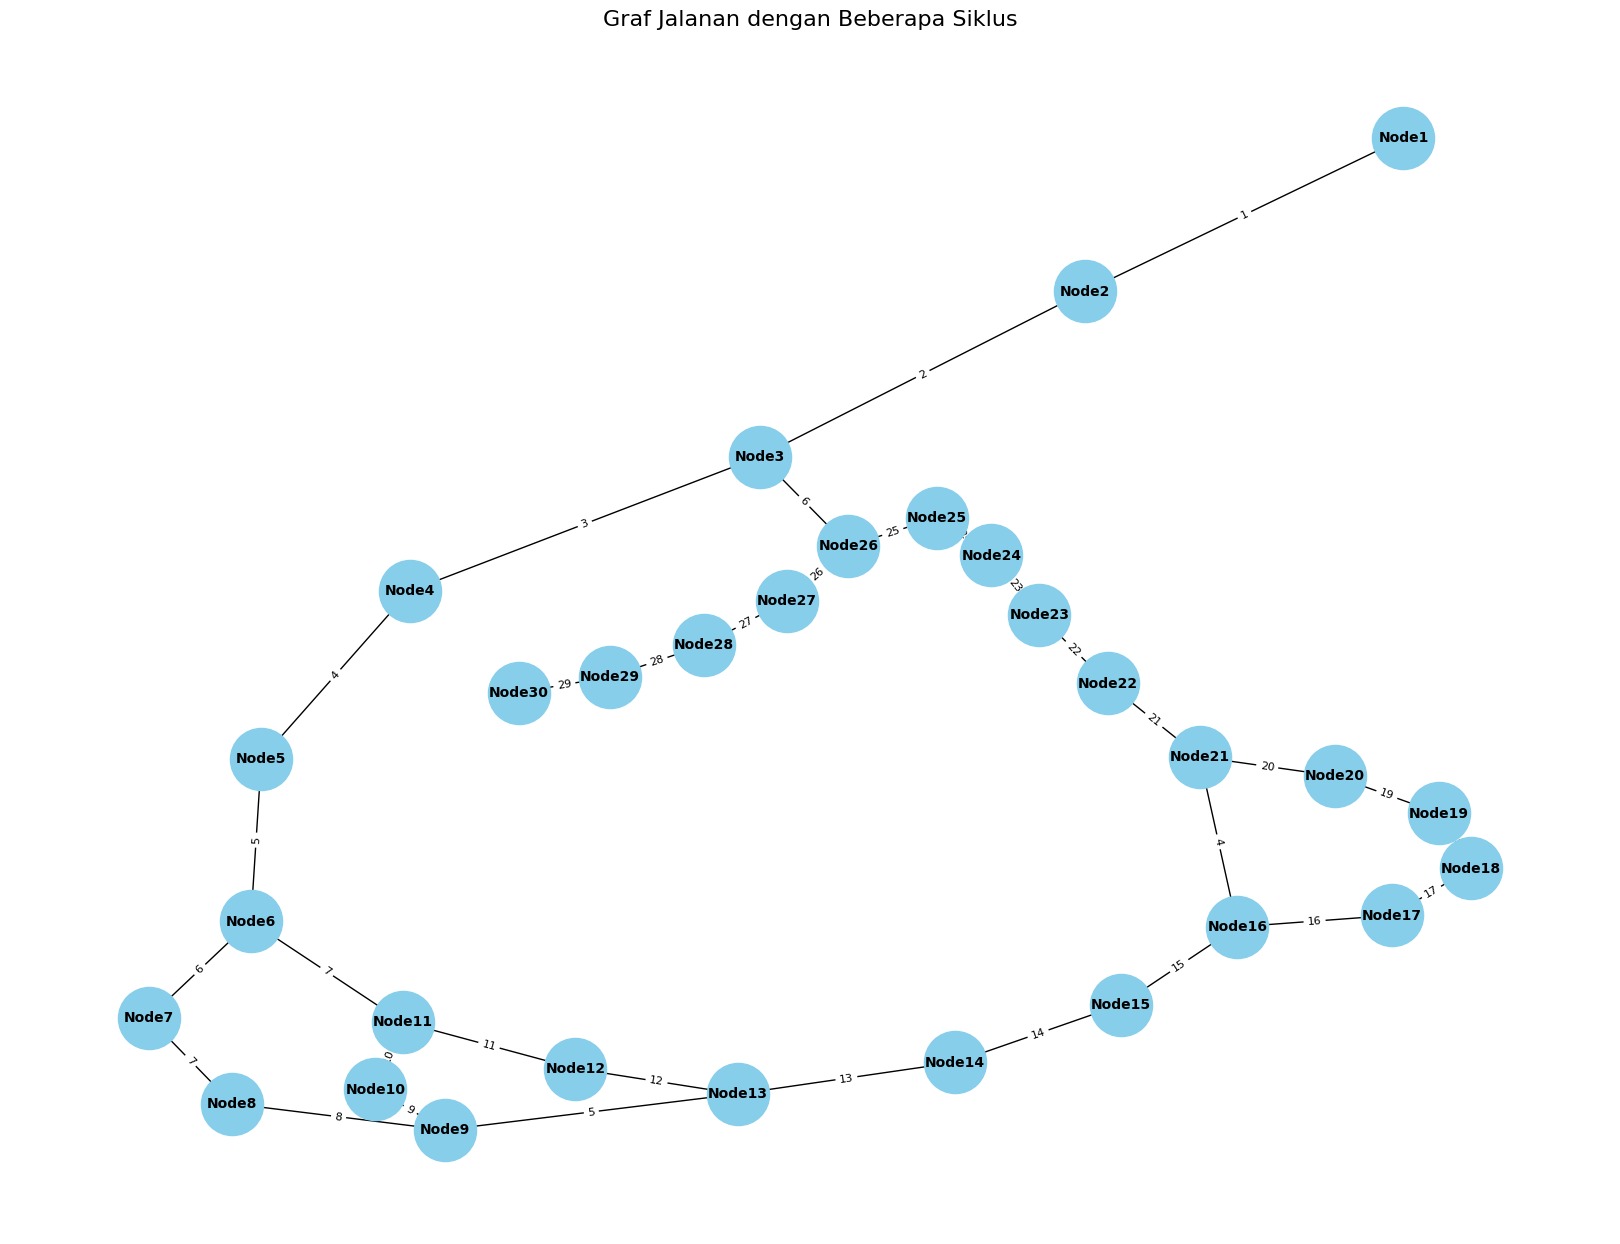

Jalur terpendek dari Node1 ke Node20: ['Node1', 'Node2', 'Node3', 'Node4', 'Node5', 'Node6', 'Node7', 'Node8', 'Node9', 'Node13', 'Node14', 'Node15', 'Node16', 'Node21', 'Node20']
Panjang jalur: 107


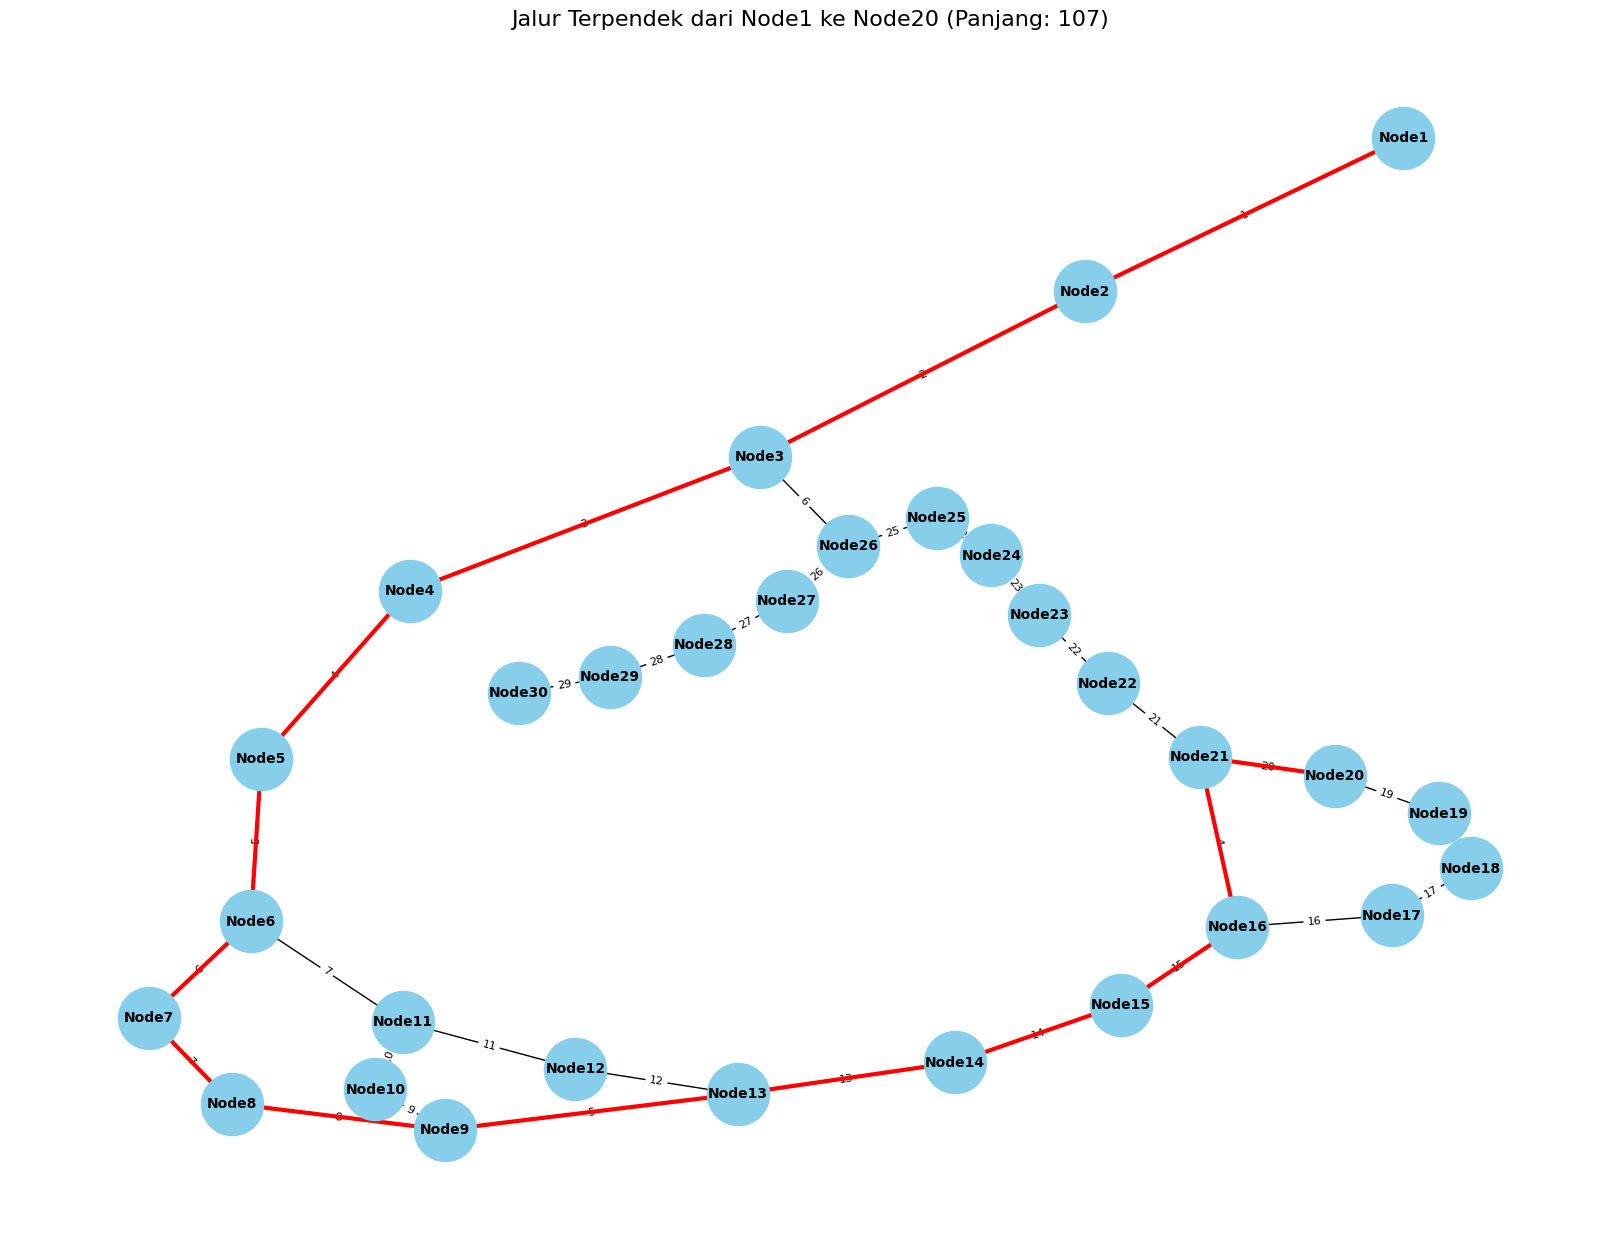

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Definisikan 30 simpul untuk graf
nodes = [f"Node{i}" for i in range(1, 31)]

# Buat graf berbentuk jalanan dengan beberapa siklus
G = nx.Graph()

# Tambahkan edge linear (jalan utama)
for i in range(len(nodes) - 1):
    G.add_edge(nodes[i], nodes[i + 1], weight=i + 1)

# Tambahkan beberapa siklus (loop tambahan)
G.add_edge(nodes[5], nodes[10], weight=7)
G.add_edge(nodes[15], nodes[20], weight=4)
G.add_edge(nodes[25], nodes[2], weight=6)
G.add_edge(nodes[8], nodes[12], weight=5)

# Posisi tata letak node
pos = nx.spring_layout(G, seed=42)  # Atur posisi node agar rapi

# Gambar graf
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight="bold")

# Tambahkan label untuk bobot pada edge
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Judul
plt.title("Graf Jalanan dengan Beberapa Siklus", fontsize=16)
plt.show()

# Algoritma Dijkstra menggunakan NetworkX
def dijkstra_shortest_path(G, start_node, target_node):
    """
    Temukan jalur terpendek menggunakan algoritma Dijkstra.
    :param G: Graf NetworkX.
    :param start_node: Simpul awal.
    :param target_node: Simpul tujuan.
    :return: Jalur terpendek dan panjangnya.
    """
    try:
        path = nx.dijkstra_path(G, source=start_node, target=target_node, weight='weight')
        length = nx.dijkstra_path_length(G, source=start_node, target=target_node, weight='weight')
        return path, length
    except nx.NetworkXNoPath:
        return None, float('inf')

# Pilih simpul awal dan tujuan
source = "Node1"
target = "Node20"

# Jalankan algoritma Dijkstra
shortest_path, shortest_length = dijkstra_shortest_path(G, source, target)

# Tampilkan hasil
if shortest_path:
    print(f"Jalur terpendek dari {source} ke {target}: {shortest_path}")
    print(f"Panjang jalur: {shortest_length}")
else:
    print(f"Tidak ada jalur dari {source} ke {target}")

# Visualisasi jalur terpendek
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Sorot jalur terpendek
if shortest_path:
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

# Judul
plt.title(f"Jalur Terpendek dari {source} ke {target} (Panjang: {shortest_length})", fontsize=16)
plt.show()


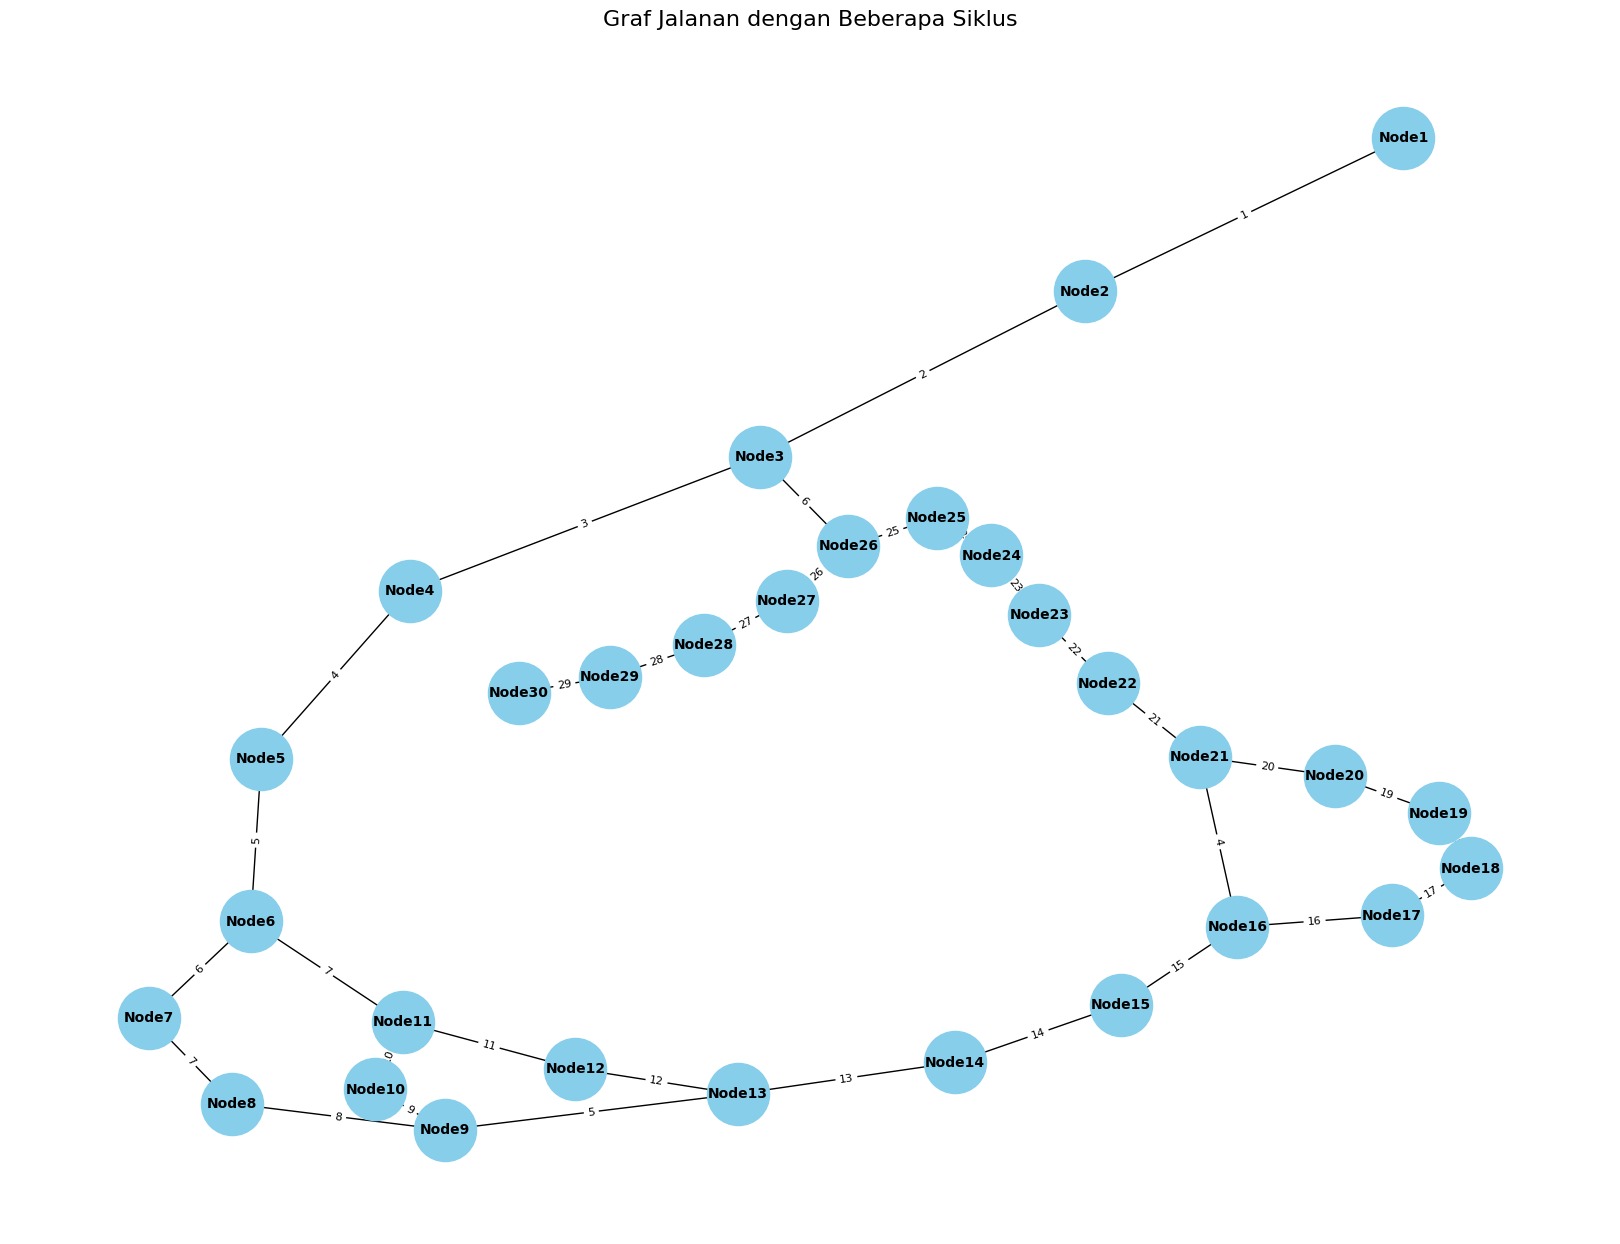

Jalur terpendek dari Node1 ke Node20: ['Node1', 'Node2', 'Node3', 'Node4', 'Node5', 'Node6', 'Node7', 'Node8', 'Node9', 'Node13', 'Node14', 'Node15', 'Node16', 'Node21', 'Node20']


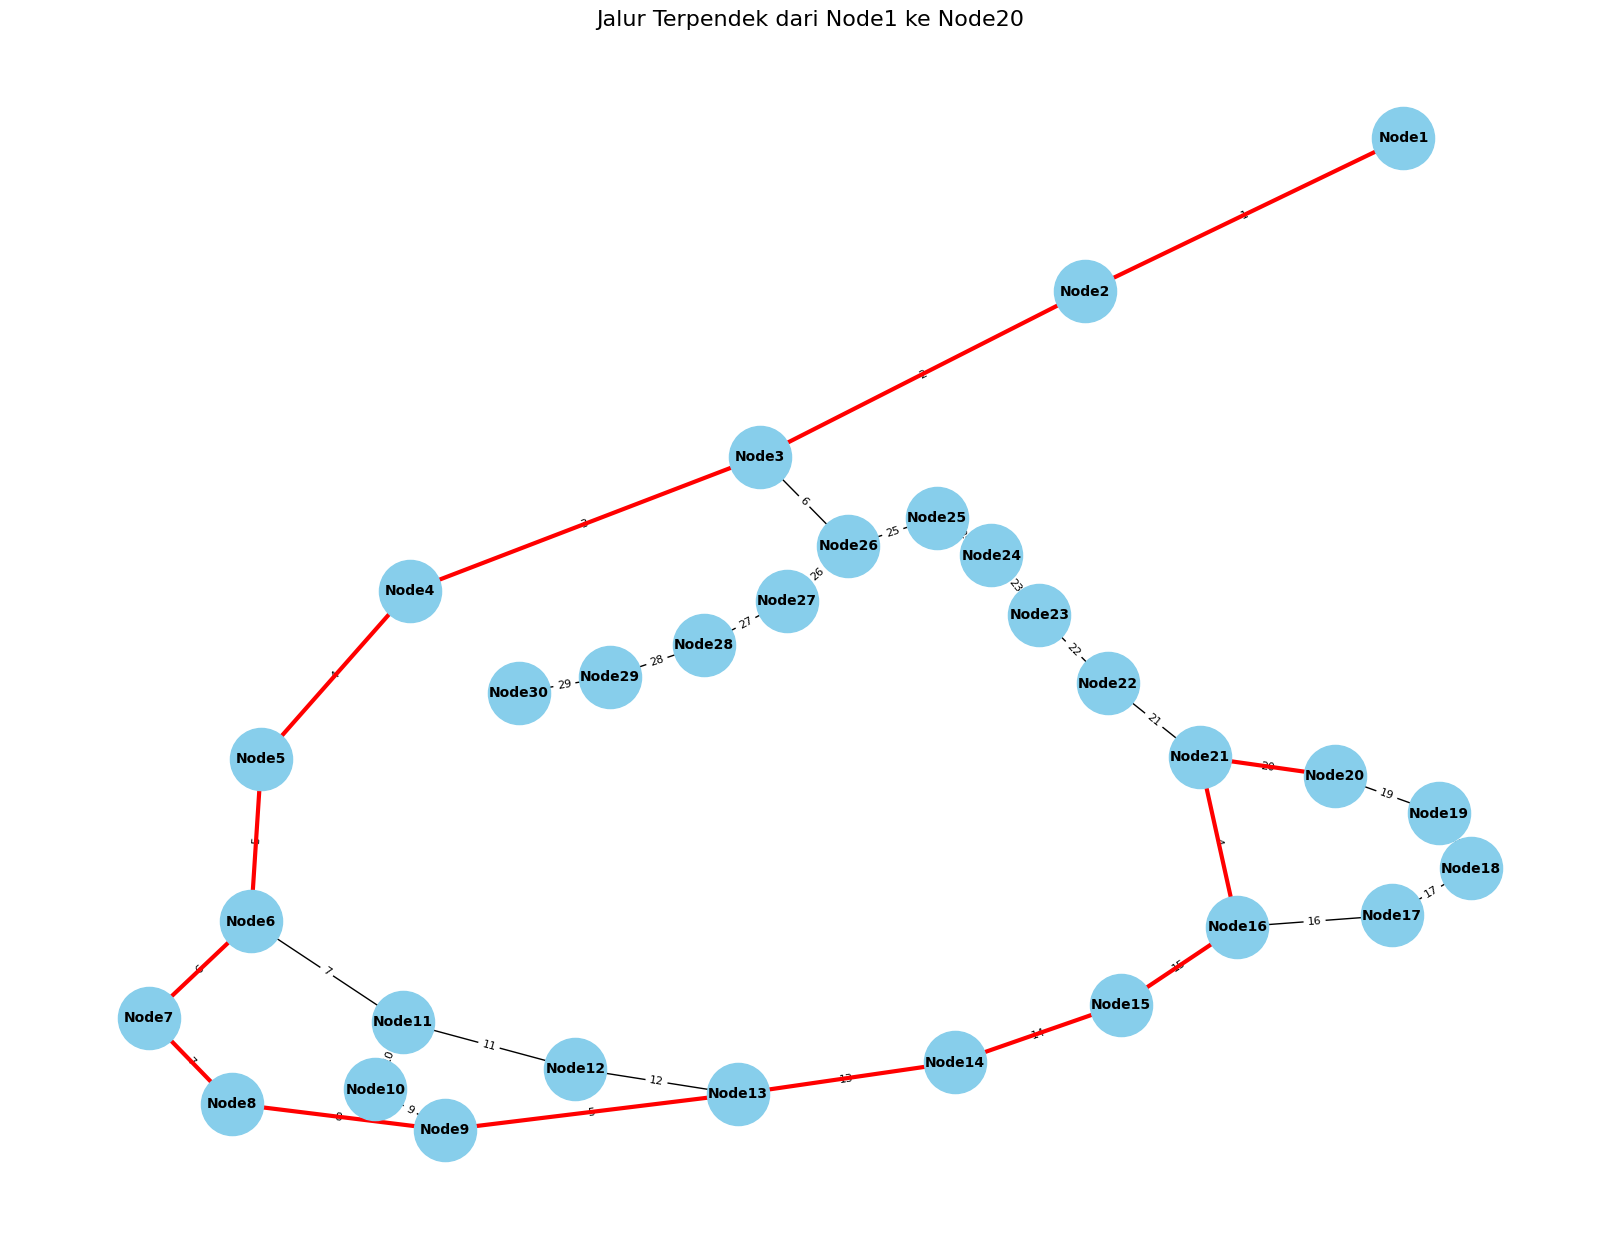

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

# **Pembuatan Graf 30 Node**
nodes = [f"Node{i}" for i in range(1, 31)]

# Buat graf berbentuk jalanan dengan beberapa siklus
G = nx.Graph()

# Tambahkan edge linear (jalan utama)
for i in range(len(nodes) - 1):
    G.add_edge(nodes[i], nodes[i + 1], weight=i + 1)

# Tambahkan beberapa siklus (loop tambahan)
G.add_edge(nodes[5], nodes[10], weight=7)
G.add_edge(nodes[15], nodes[20], weight=4)
G.add_edge(nodes[25], nodes[2], weight=6)
G.add_edge(nodes[8], nodes[12], weight=5)

# Posisi tata letak node
pos = nx.spring_layout(G, seed=42)  # Atur posisi node agar rapi

# Gambar graf
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight="bold")

# Tambahkan label untuk bobot pada edge
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Judul
plt.title("Graf Jalanan dengan Beberapa Siklus", fontsize=16)
plt.show()

# **Algoritma A* (A-Star)**
def a_star_recursive(graph, start, goal, heuristic, open_set=None, g_score=None, came_from=None):
    """
    Algoritma A* rekursif untuk menemukan jalur terpendek.
    :param graph: Dictionary adjacency list graf.
    :param start: Node awal.
    :param goal: Node tujuan.
    :param heuristic: Fungsi heuristik untuk node.
    :return: Jalur terpendek (list node).
    """
    if open_set is None:
        open_set = []
        heapq.heappush(open_set, (0 + heuristic[start], start))

    if g_score is None:
        g_score = {node: float('inf') for node in graph}
        g_score[start] = 0

    if came_from is None:
        came_from = {}

    # Base case: jika open_set kosong, tidak ada jalur
    if not open_set:
        return None  # Jalur tidak ditemukan

    # Ambil node dengan nilai f (g + h) terkecil dari open_set
    _, current = heapq.heappop(open_set)

    # Jika mencapai tujuan, bangun jalur dari came_from
    if current == goal:
        path = []
        while current in came_from:
            path.append(current)
            current = came_from[current]
        path.append(start)
        return path[::-1]  # Balikkan urutan path

    # Iterasi tetangga dari node saat ini
    for neighbor, cost in graph[current].items():
        tentative_g_score = g_score[current] + cost

        if tentative_g_score < g_score[neighbor]:
            # Update g_score dan jalur
            g_score[neighbor] = tentative_g_score
            f_score = tentative_g_score + heuristic[neighbor]
            came_from[neighbor] = current

            # Jika tetangga belum ada di open_set, tambahkan
            if not any(neighbor == item[1] for item in open_set):
                heapq.heappush(open_set, (f_score, neighbor))

    # Rekursi dengan status terkini
    return a_star_recursive(graph, start, goal, heuristic, open_set, g_score, came_from)

# **Konversi Graf NetworkX ke Format Dictionary**
def convert_graph_to_dict(G):
    """
    Mengonversi graf NetworkX ke format dictionary adjacency list.
    :param G: Graf NetworkX.
    :return: Dictionary adjacency list.
    """
    graph_dict = {}
    for node in G.nodes:
        graph_dict[node] = {neighbor: G[node][neighbor]['weight'] for neighbor in G.neighbors(node)}
    return graph_dict

graph_dict = convert_graph_to_dict(G)

# **Fungsi Heuristik**
def heuristic(node):
    """
    Fungsi heuristik sederhana (mengembalikan 0 untuk jalur Dijkstra murni).
    :param node: Node.
    :return: Nilai heuristik (di sini 0).
    """
    return 0

# **Jalankan Algoritma A***
source = "Node1"
target = "Node20"

path = a_star_recursive(graph_dict, source, target, {n: heuristic(n) for n in G.nodes})

if path:
    print(f"Jalur terpendek dari {source} ke {target}: {path}")
else:
    print(f"Tidak ada jalur dari {source} ke {target}")

# **Visualisasi Jalur**
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

if path:
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

plt.title(f"Jalur Terpendek dari {source} ke {target}", fontsize=16)
plt.show()
